In [10]:
from pathlib2 import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import IPython
import librosa
import librosa.display
from tqdm.autonotebook import tqdm

/home/AD/tsainbur/anaconda3/envs/neuroethology/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  if __name__ == '__main__':


### data locations

In [11]:
from glob import glob

In [12]:
fg_list = glob('/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/*_PC1113_*.wav')
len(fg_list), np.sort(fg_list)[-10:]

(234,
 array(['/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0025.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0026.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0027.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0028.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0029.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0030.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0031.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0032.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0033.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day2_PC1113_0034.wav'],
       dtype='<U78'))

In [13]:
bg_list = glob('/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-bg/*_PC1113_*.wav')
len(bg_list), np.sort(bg_list)[-10:]

(230,
 array(['/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-bg/linhart2015marnosong_day2_PC1113_0024.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-bg/linhart2015marnosong_day2_PC1113_0025.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-bg/linhart2015marnosong_day2_PC1113_0026.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-bg/linhart2015marnosong_day2_PC1113_0027.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-bg/linhart2015marnosong_day2_PC1113_0028.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-bg/linhart2015marnosong_day2_PC1113_0029.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-bg/linhart2015marnosong_day2_PC1113_0030.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-bg/linhart2015marnosong_day2_PC1113_0031.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-bg/linhart2015marnosong_day2_PC1113_0032.wav',
        '/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-b

In [14]:
DSLOC = Path('/mnt/cube/Datasets/StowellBirdID/')
DSLOC

PosixPath('/mnt/cube/Datasets/StowellBirdID')

In [15]:
csv_list = list(DSLOC.expanduser().glob('csv/*.csv'))
csv_list[:3]

[PosixPath('/mnt/cube/Datasets/StowellBirdID/csv/chiffchaff-acrossyear-bg-trn.csv'),
 PosixPath('/mnt/cube/Datasets/StowellBirdID/csv/pipit-withinyear-fg-tst.csv'),
 PosixPath('/mnt/cube/Datasets/StowellBirdID/csv/chiffchaff-acrossyear-bg-tst.csv')]

In [16]:
wav_list = list(DSLOC.expanduser().glob('wav/*/*.wav'))
wav_list[:3], len(wav_list)

([PosixPath('/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day1_PC1109_0386.wav'),
  PosixPath('/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day1_PC1109_0421.wav'),
  PosixPath('/mnt/cube/Datasets/StowellBirdID/wav/chiffchaff-fg/cutted_day1_PC1107_0483.wav')],
 23753)

In [ ]:
#from pydub.utils import mediainfo

In [28]:
wav_df = pd.DataFrame(columns = ['indv', 'species', 'wavloc', 'wavnum', 'split', 'fgbg', 'cutted', 'size'])#, 'audio', 'rate'])
for wf in tqdm(wav_list):
    species, fgbg = wf.parent.stem.split('-')
    cutted, split, indv, recording_num = wf.stem.split('_')
    #rate, data = load_wav(wf)
    wav_df.loc[len(wav_df)] = [indv, species, wf, recording_num, split, fgbg, cutted, wf.stat().st_size]#, data, rate]

  0%|          | 0/23753 [00:00<?, ?it/s]

In [31]:
wav_df = wav_df.sort_values(by='size', ascending=False)

indv     species                                             wavloc  \
13474  PC1104  chiffchaff  /mnt/cube/Datasets/StowellBirdID/wav/chiffchaf...   
19080  pc1104  chiffchaff  /mnt/cube/Datasets/StowellBirdID/wav/chiffchaf...   
15375  pc1103  chiffchaff  /mnt/cube/Datasets/StowellBirdID/wav/chiffchaf...   

      wavnum split fgbg                cutted      size  
13474   0043  day1   bg  linhart2015marnosong  10347060  
19080   0043  day1   bg                cutted  10347060  
15375   0006  day2   bg                cutted   8738574

In [34]:
wav_df[wav_df.fgbg=='fg'][:3]

indv     species                                             wavloc  \
2233  PC1107  chiffchaff  /mnt/cube/Datasets/StowellBirdID/wav/chiffchaf...   
442   PC1110  chiffchaff  /mnt/cube/Datasets/StowellBirdID/wav/chiffchaf...   
605   PC1110  chiffchaff  /mnt/cube/Datasets/StowellBirdID/wav/chiffchaf...   

     wavnum split fgbg  cutted     size  
2233   0350  day1   fg  cutted  3255036  
442    0000  day2   fg  cutted  2619564  
605    0007  day2   fg  cutted  2303670

813748 22050 36.90467120181406


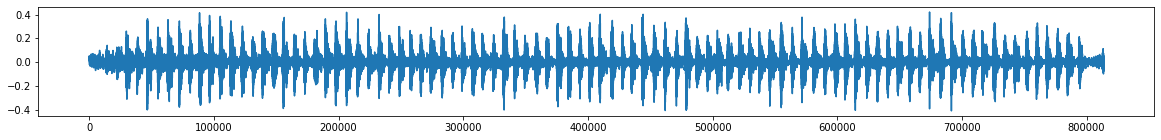

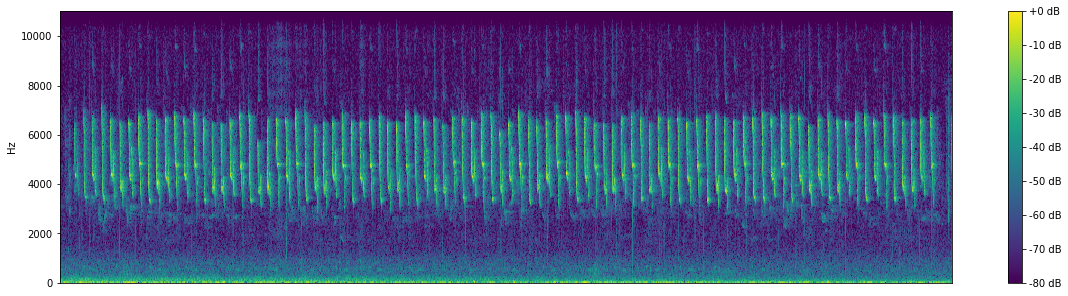

In [44]:
for idx, row in wav_df[wav_df.fgbg=='fg'].iterrows():
    y, sr = librosa.load(row.wavloc.as_posix())

    print(len(y), sr, len(y)/sr)

    fig, ax = plt.subplots(figsize=(20,2))
    ax.plot(y)

    D = np.abs(librosa.stft(y, n_fft=512))**2
    S_dB = librosa.power_to_db(D, ref=np.max)
    spec = S_dB

    fig, ax = plt.subplots(figsize=(20,5))
    img = librosa.display.specshow(spec, cmap='viridis', y_axis='linear', sr=sr,
                             fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    plt.show()
    break

In [45]:
row = wav_df[wav_df.fgbg=='fg'].iloc[0]

In [156]:
y, sr = librosa.load(row.wavloc.as_posix())
y = y[2000:400000]

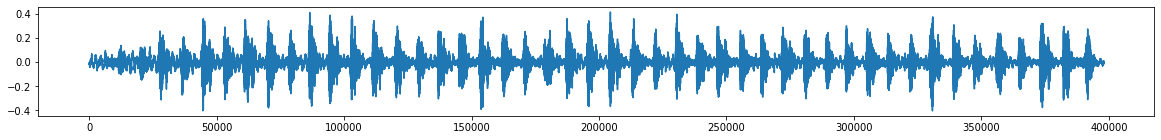

In [157]:
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(y)

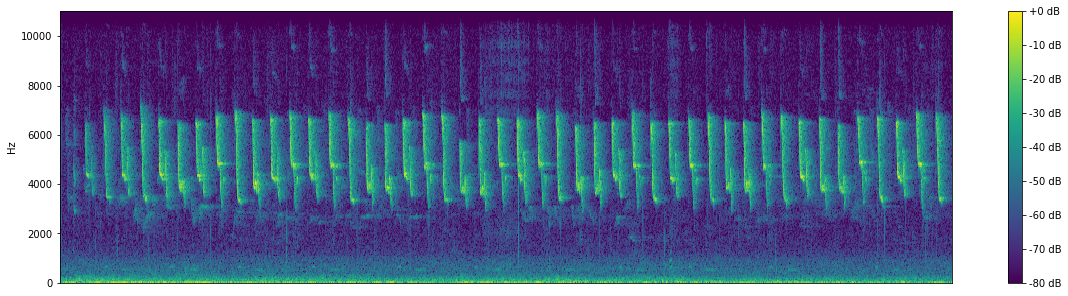

In [158]:
D = np.abs(librosa.stft(y, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB

fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(spec, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()

In [159]:
from noisereduce.generate_noise import band_limited_noise

In [160]:
import copy

In [228]:
y_increasing = copy.deepcopy(y)
y_noise = band_limited_noise(5000, 8000, samples = len(y), samplerate= sr)

start = 100000
stop = 200000
y_noise[:start] = 0
mult = 2
y_noise[start:stop] = y_noise[start:stop] * np.linspace(0, 1, stop-start)
#y_increasing[start:stop] = y_increasing[start:stop] * np.linspace(1, mult, stop-start)
#y_increasing[stop:] = y_increasing[stop:] * mult


y_with_noise = y_increasing+y_noise*40

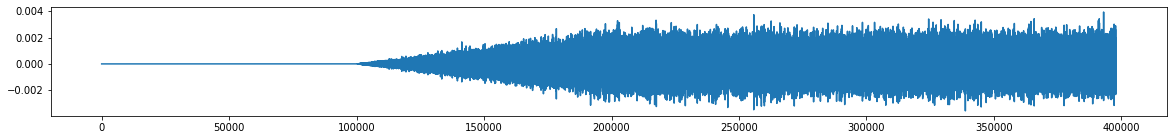

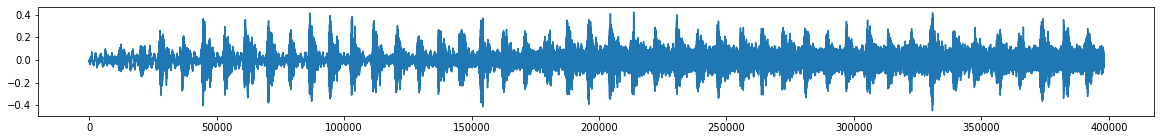

In [229]:
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(y_noise)
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(y_with_noise)

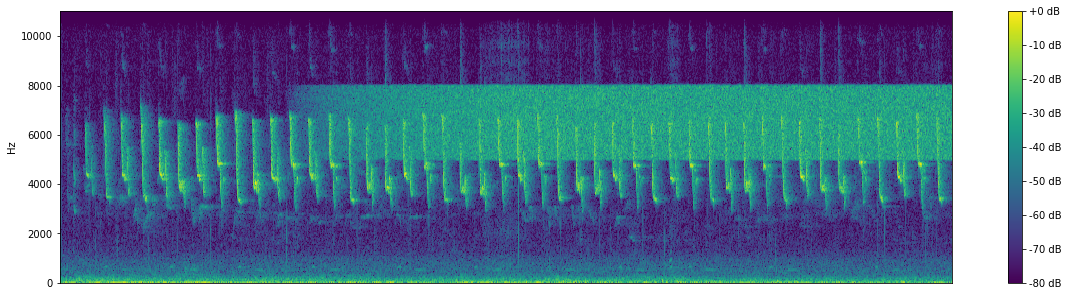

In [230]:
D = np.abs(librosa.stft(y_with_noise, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB
fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(spec, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

In [242]:
import noisereduce as nr 

In [274]:
reduced_noise_stationary = nr.reduce_noise(y = y_with_noise, sr=sr, stationary=True, n_std_thresh_stationary = 1.5, n_fft = 512)

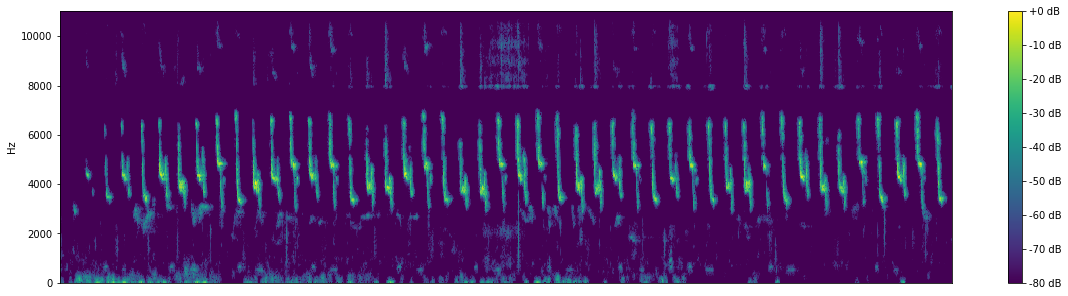

In [275]:
D = np.abs(librosa.stft(reduced_noise_stationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_stationary = S_dB
fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(spec_stationary, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

In [286]:
reduced_noise_nonstationary = nr.reduce_noise(y = y_with_noise, sr=sr, thresh_n_mult_nonstationary=1.75,stationary=False, time_constant_s = 0.1)

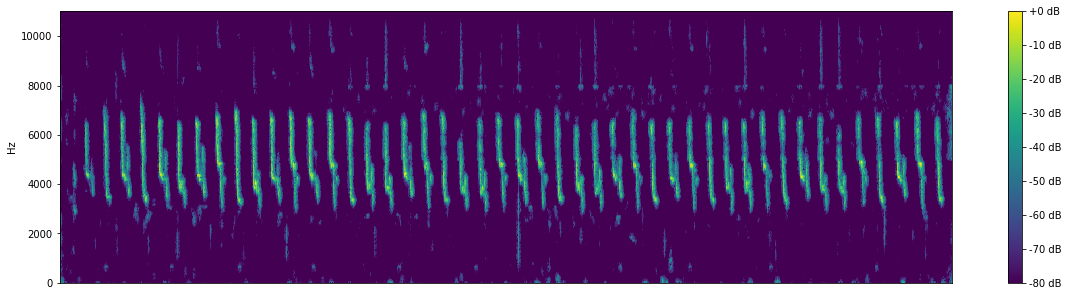

In [287]:
D = np.abs(librosa.stft(reduced_noise_nonstationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_nonstationary = S_dB
fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(spec_nonstationary, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

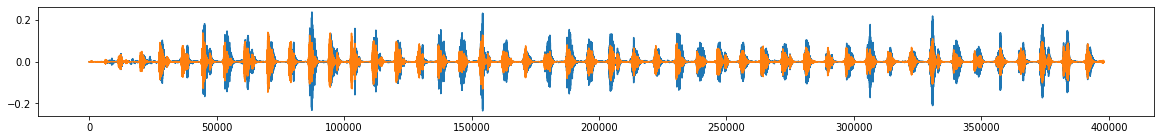

In [288]:
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(reduced_noise_stationary)
#fig, ax = plt.subplots(figsize=(20,2))
ax.plot(reduced_noise_nonstationary)

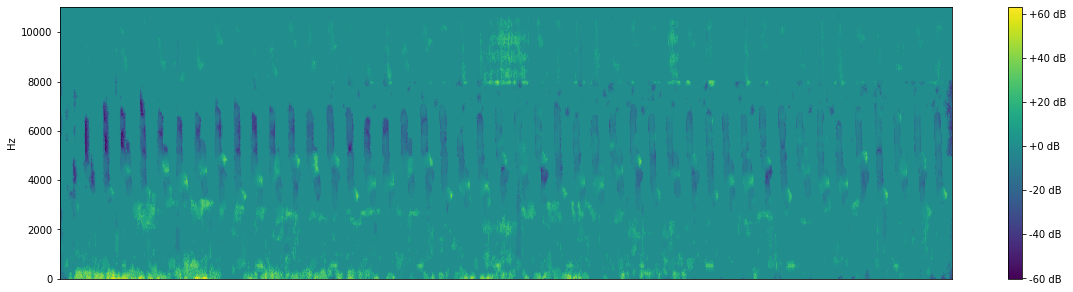

In [289]:
fig, ax = plt.subplots(figsize=(20,5))

img = librosa.display.specshow(spec_stationary-spec_nonstationary, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()

In [385]:
y, sr = librosa.load(row.wavloc.as_posix())
y = y[2000:800000]

In [386]:
y_increasing = copy.deepcopy(y)
y_noise = band_limited_noise(5000, 8000, samples = len(y), samplerate= sr)

start = 200000
stop = 250000
y_noise[:start] = 0
mult = 2
y_noise[start:stop] = y_noise[start:stop] * np.linspace(0, 1, stop-start)
#y_increasing[start:stop] = y_increasing[start:stop] * np.linspace(1, mult, stop-start)
#y_increasing[stop:] = y_increasing[stop:] * mult


y_with_noise = y_increasing+y_noise*40

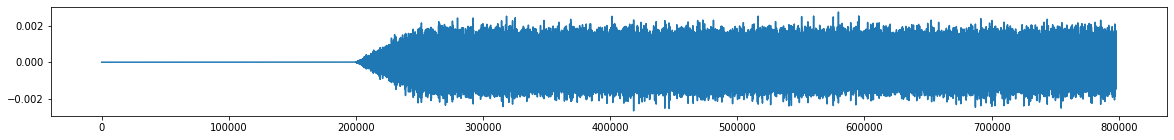

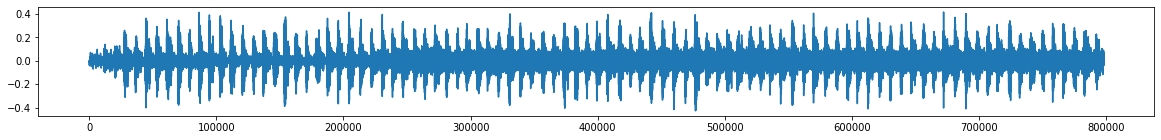

In [387]:
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(y_noise)
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(y_with_noise)

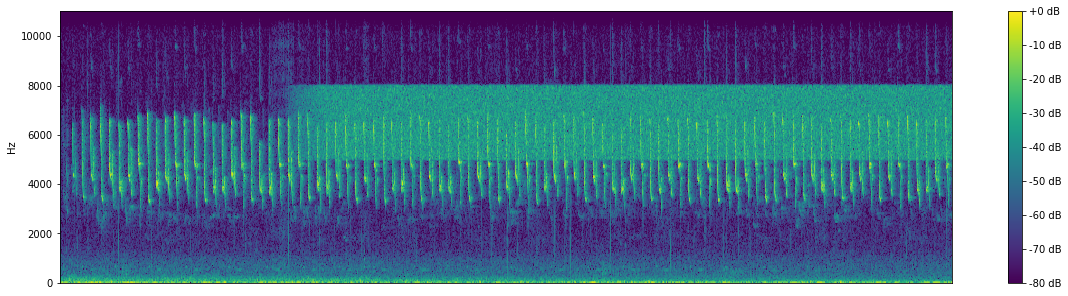

In [388]:
D = np.abs(librosa.stft(y_with_noise, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB
fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(spec, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

In [389]:
import noisereduce as nr 

In [409]:
reduced_noise_stationary = nr.reduce_noise(y = y_with_noise, sr=sr, stationary=True, n_std_thresh_stationary = 1.75, n_fft = 512)

  0%|          | 0/2 [00:00<?, ?it/s]

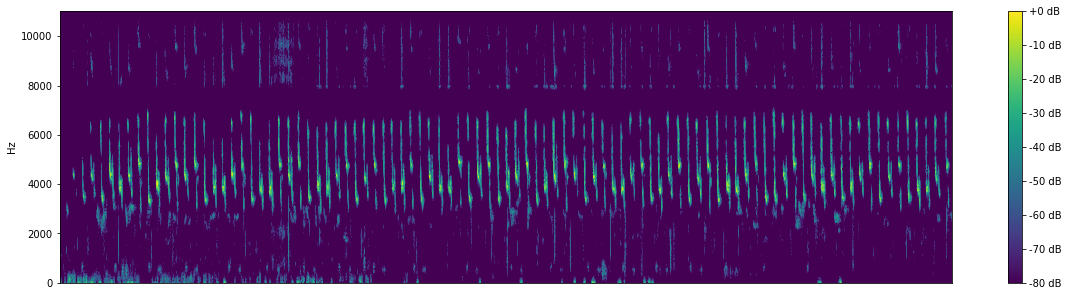

In [410]:
D = np.abs(librosa.stft(reduced_noise_stationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_stationary = S_dB
fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(spec_stationary, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

In [411]:
reduced_noise_nonstationary = nr.reduce_noise(y = y_with_noise, sr=sr, thresh_n_mult_nonstationary=1.75,stationary=False, time_constant_s = 0.5)

  0%|          | 0/2 [00:00<?, ?it/s]

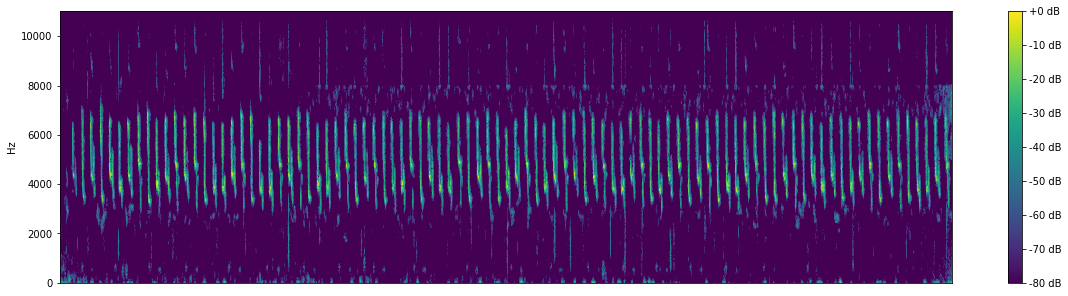

In [412]:
D = np.abs(librosa.stft(reduced_noise_nonstationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_nonstationary = S_dB
fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(spec_nonstationary, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

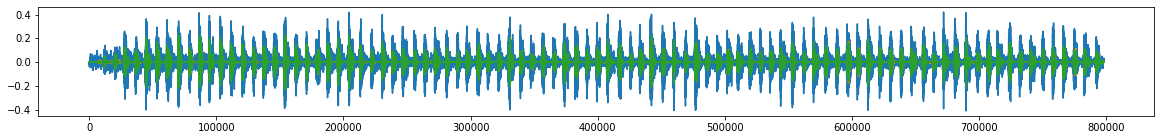

In [413]:
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(y_increasing)
ax.plot(reduced_noise_stationary)
ax.plot(reduced_noise_nonstationary)

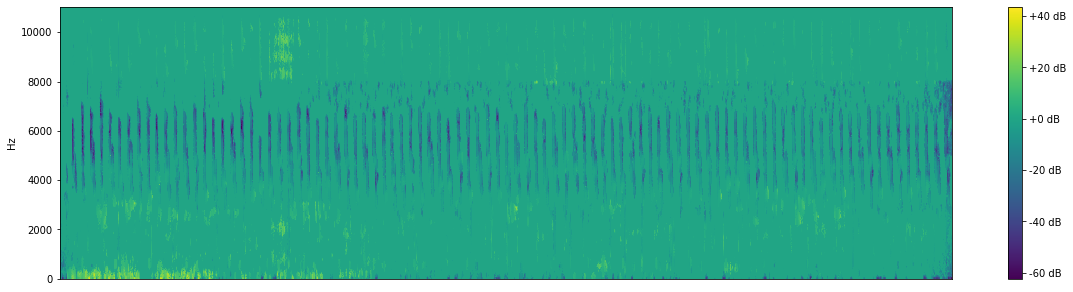

In [414]:
fig, ax = plt.subplots(figsize=(20,5))

img = librosa.display.specshow(spec_stationary-spec_nonstationary, cmap='viridis', y_axis='linear', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()

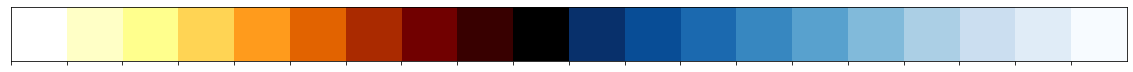

In [559]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import copy

afm_hot = cm.get_cmap('afmhot', 10)
bone  = cm.get_cmap('bone', 10)
blues  = cm.get_cmap('Blues', 10)

np.logspace(-10,0, 10)

afmhot_blues = np.vstack([afm_hot(np.linspace(0,1, 10))[::-1], blues(np.linspace(0,1, 10))[::-1]])#[::-1]

afmhot_blues_cmap = LinearSegmentedColormap.from_list('afmhot_blues', afmhot_blues)

import seaborn as sns

sns.palplot(afmhot_blues)

In [535]:
y, sr = librosa.load(row.wavloc.as_posix())
y = y[2000:800000]

y_increasing = copy.deepcopy(y)
y_noise = band_limited_noise(5000, 8000, samples = len(y), samplerate= sr)

start = 200000
stop = 250000
y_noise[:start] = 0
mult = 3
y_noise[start:stop] = y_noise[start:stop] * np.linspace(0, 1, stop-start)
#y_increasing[start:stop] = y_increasing[start:stop] * np.linspace(1, mult, stop-start)
#y_increasing[stop:] = y_increasing[stop:] * mult


y_with_noise = y_increasing+y_noise*40

In [543]:
reduced_noise_stationary = nr.reduce_noise(y = y_with_noise, sr=sr, stationary=True, n_std_thresh_stationary = 1.5, n_fft = 512)
reduced_noise_nonstationary = nr.reduce_noise(y = y_with_noise, sr=sr, thresh_n_mult_nonstationary=1.75,stationary=False, time_constant_s = 0.5)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [544]:
D = np.abs(librosa.stft(reduced_noise_stationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_stationary = S_dB
D = np.abs(librosa.stft(reduced_noise_nonstationary, n_fft=512))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec_nonstationary = S_dB

In [545]:
end2 = 4000

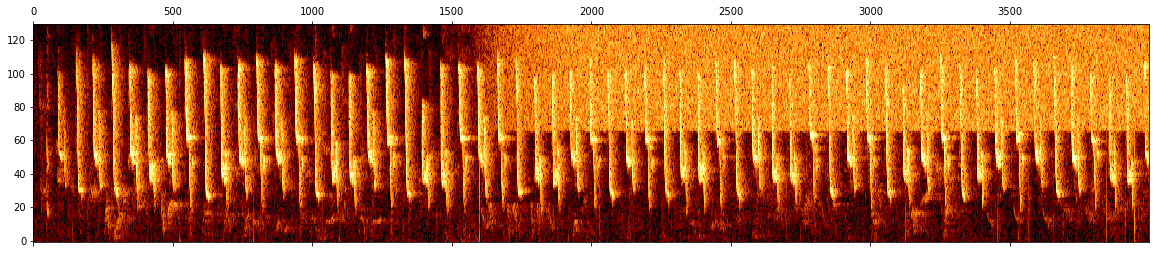

In [555]:
fig, ax = plt.subplots(figsize=(20,4))
ax.matshow(spec[ 50:180, :end2], origin = 'lower', aspect='auto', cmap = plt.cm.afmhot)

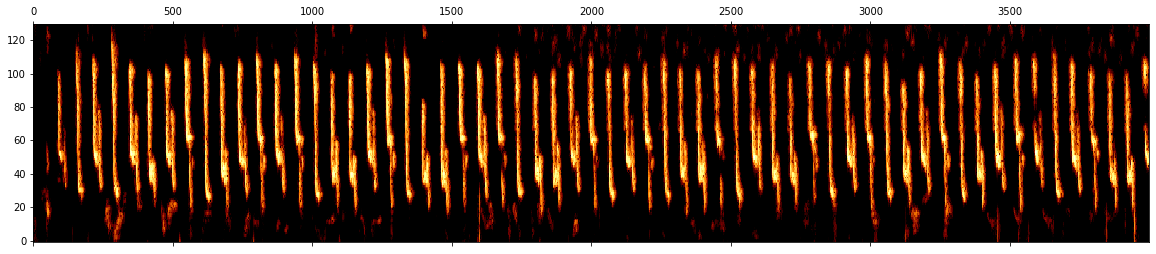

In [556]:
fig, ax = plt.subplots(figsize=(20,4))
ax.matshow(spec_nonstationary[ 50:180, :end2], origin = 'lower', aspect='auto', cmap = plt.cm.afmhot)

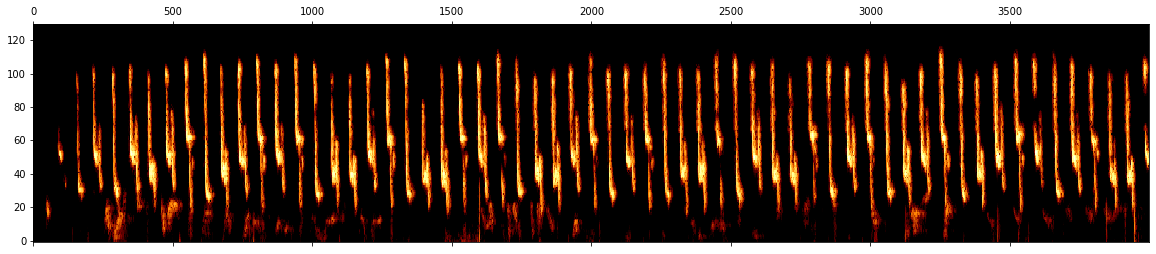

In [557]:
fig, ax = plt.subplots(figsize=(20,4))
ax.matshow(spec_stationary[ 50:180, :end2], origin = 'lower', aspect='auto', cmap = plt.cm.afmhot)

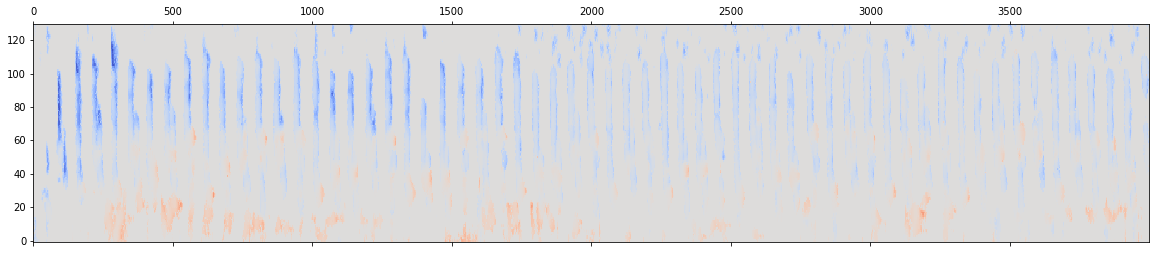

In [564]:
fig, ax = plt.subplots(figsize=(20,4))
diff_spec = spec_stationary[ 50:180, :end2] - spec_nonstationary[ 50:180, :end2]
ax.matshow(diff_spec, origin = 'lower', aspect='auto', cmap= plt.cm.coolwarm, vmax=np.max(np.abs(diff_spec)),vmin=-np.max(np.abs(diff_spec)))

In [563]:
np.mean(diff_spec)

-1.4491088840573427

In [561]:
np.max(diff_spec), np.min(diff_spec)

(29.37273170284115, -55.88506031322383)